In [2]:
import pandas as pd #For data manipulation and analysis using DataFrames
import numpy as np #For numerical operations and working with arrays
import matplotlib.pyplot as plt #For basic plotting and visualizations
import seaborn as sns #Built on top of matplotlib, provides more attractive and complex visualizations
import json #For reading and writing JSON data
import os #To interact with the operating system
import glob #For file pattern matching 
import dask.dataframe as dd #For working with large datasets that don’t fit into memory,similar to pandas but designed for scalability
import warnings #Suppresses warning messages
warnings.filterwarnings("ignore")

In [3]:
#first 10 rows of dataframe are shown
df = pd.read_csv('ratings.csv')
df.head(10) 

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [4]:
#naming the columns 
df.columns = ['User_Id', 'Product_Id', 'Ratings', 'Timestamp'] 
df

,User_Id,Product_Id,Ratings,Timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
...,...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [5]:
#Exploratory Data Analysis
#Here are some ideas for the Exploratory Data Analysis (EDA), tailored to our multi-objective recommender system competition:

#✅Data Overview & Basic Statistics:
#Check the number of unique Product_Id and total Ratings.
#Identify the distribution of Ratings. 
#Examine the time range covered in the dataset (earliest & latest timestamps). 
#Identify missing values.

#✅Rating Type Distribution:
#Compare the proportions of Ratings. 
                                               
#✅Time-Based Patterns:
#Explore the distribution of timestamps (e.g., peak activity hours). 
#Analyze session duration (time difference between first and last event). 

#✅Product Analysis:
#Find the most frequently rated Products. 
#Determine whether certain products have a high or low ratings. 
#Identify whether some products are frequently abandoned.

In [6]:
#✅Data Overview & Basic Statistics

In [7]:
# Quick overview
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   User_Id     object 
 1   Product_Id  object 
 2   Ratings     float64
 3   Timestamp   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB
None


In [8]:
# Statistical summary (only for numerical columns) 
print(df.describe())

            Ratings     Timestamp
count  7.824481e+06  7.824481e+06
mean   4.012337e+00  1.338178e+09
std    1.380910e+00  6.900426e+07
min    1.000000e+00  9.127296e+08
25%    3.000000e+00  1.315354e+09
50%    5.000000e+00  1.361059e+09
75%    5.000000e+00  1.386115e+09
max    5.000000e+00  1.406074e+09


In [9]:
# Convert Unix timestamp to datetime (milliseconds assumed)
df["datetime"] = pd.to_datetime(df["Timestamp"], unit="ms")  

In [10]:
df

,User_Id,Product_Id,Ratings,Timestamp,datetime
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,1970-01-16 12:31:40.800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,1970-01-16 19:46:33.600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,1970-01-16 21:47:31.200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,1970-01-16 10:45:07.200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600,1970-01-17 04:10:33.600
...,...,...,...,...,...
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600,1970-01-17 03:56:09.600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400,1970-01-16 04:49:26.400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800,1970-01-17 06:02:52.800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200,1970-01-16 00:25:55.200


In [11]:
#distinct or unique values in dataset 
print(f"The number of unique users: {df['User_Id'].nunique()}")  

#unique values
print(f"The number of unique product is: {df['Product_Id'].nunique()}") 

#gives number of rows i.e, ratings
print(f"The number of ratings: {df.shape[0]}")  


#min value
print(f"Earliest Timestamp in the data: {df['datetime'].min()}") 
#max value
print(f"Latest Timestamp in the data: {df['datetime'].max()}") 

print('-------------------------------------')

# Check for missing values (NaNs) in each column
missing_values = df.isnull().sum()
print('Check for missing values')
missing_values

The number of unique users: 4201696
The number of unique product is: 476001
The number of ratings: 7824481
Earliest Timestamp in the data: 1970-01-11 13:32:09.600000
Latest Timestamp in the data: 1970-01-17 06:34:33.600000
-------------------------------------
Check for missing values


User_Id       0
Product_Id    0
Ratings       0
Timestamp     0
datetime      0
dtype: int64

In [12]:
# Check for duplicates
print("Duplicate records:", df.duplicated().sum())

Duplicate records: 0


In [13]:
#counts how many times each rating appears in the column
event_counts = df["Ratings"].value_counts().reset_index() 
event_counts.columns = ["Rating_Num", "Count"]

# Calculate percentage
event_counts["Percentage %"] = ((event_counts["Count"] / event_counts["Count"].sum()) * 100).round(2)

In [14]:
event_counts.style.set_table_styles(
    [
        {"selector": "th", "props": [("background-color", "#016FD0"), ("color", "white"), ("font-weight", "bold")]}
    ]
).hide(axis="index").background_gradient(subset=["Percentage %"], cmap="Blues")  # Blue-Green gradient

Rating_Num,Count,Percentage %
5.000000,4347540,55.560000
4.000000,1485781,18.990000
1.000000,901765,11.520000
3.000000,633073,8.090000
2.000000,456322,5.830000


In [15]:
#✅ Rating Type Distribution

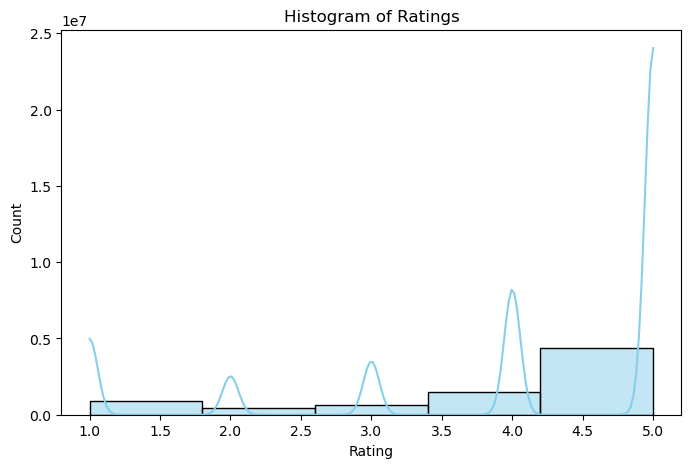

In [16]:
## Histogram of Rating
plt.figure(figsize=(8,5))
sns.histplot(df['Ratings'], bins=5, kde=True, color='skyblue')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [17]:
# Define Rating types to keep
Ratings_to_keep = [5, 4, 3, 1]

# Step 1: Identify Ratings from 5
user_filter = df[df["Ratings"].isin(Ratings_to_keep)]["User_Id"].unique()

# Step 2: Filter the original DataFrame to keep only these sessions
filtered_df = df[df["User_Id"].isin(user_filter)]

In [18]:
# Define event type mappings
filtered_df["is_1"] = (filtered_df["Ratings"] == 1).astype("int64")
filtered_df["is_3"] = (filtered_df["Ratings"] == 3).astype("int64")
filtered_df["is_4"] = (filtered_df["Ratings"] == 4).astype("int64")
filtered_df["is_5"] = (filtered_df["Ratings"] == 5).astype("int64")

In [19]:
filtered_df.head(20)

,User_Id,Product_Id,Ratings,Timestamp,datetime,is_1,is_3,is_4,is_5
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,1970-01-16 12:31:40.800,0,0,0,1
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,1970-01-16 19:46:33.600,1,0,0,0
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,1970-01-16 21:47:31.200,0,1,0,0
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,1970-01-16 10:45:07.200,1,0,0,0
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600,1970-01-17 04:10:33.600,0,0,0,1
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600,1970-01-17 04:10:33.600,0,0,0,0
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400,1970-01-17 03:44:38.400,0,0,0,1
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800,1970-01-17 03:38:52.800,0,0,0,1
8,A89DO69P0XZ27,0511189877,5.0,1395446400,1970-01-17 03:37:26.400,0,0,0,1
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600,1970-01-17 05:15:21.600,0,0,0,1


In [20]:
num_rows = filtered_df.shape[0]  #row count
num_columns = len(filtered_df.columns)  #Column count

print(f"Shape of DataFrame: ({num_rows}, {num_columns})")
print(f"The number of unique user id with their given ratings: {filtered_df['User_Id'].nunique()}") #how many unique users are present

Shape of DataFrame: (7628427, 9)
The number of unique user id with their given ratings: 4010689


In [21]:
#Group by User_Id and sum up the ratings counts

user_rating_counts = (
    filtered_df.groupby("User_Id")  #groups data so that we can perform operations
    .agg( #aggregate to compute summary statistics for each group 
        total_1_rating=("is_1", "sum"),        # Sum of users with rating 1 
        total_3_rating=("is_3", "sum"),        # Sum of users with rating 3
        total_4_rating=("is_4", "sum"),        # Sum of users with rating 4
        total_5_rating=("is_5", "sum")         # Sum of users with rating 5
    )
    .reset_index()
)

In [22]:
# Rename columns for clarity
user_rating_counts.columns = ["User_id", "num_1_rating", "num_3_rating", "num_4_rating", "num_5_rating"]

In [23]:
user_rating_counts.head()

,User_id,num_1_rating,num_3_rating,num_4_rating,num_5_rating
0,A00000262KYZUE4J55XGL,0,0,0,1
1,A000063614T1OE0BUSKUT,0,0,0,2
2,A00009182QVLSWIGHLS1B,0,0,0,1
3,A00009661LC9LQPGKJ24G,0,0,0,1
4,A00010809P09NUU6ZP6H,0,0,0,1


In [24]:
#✅ Time-Based Patterns:

In [25]:
#Extract time-based features
df["hour"] = df["datetime"].dt.hour

# Extract the weekday name
df["weekday"] = df["datetime"].dt.strftime("%A")  # Full weekday name (e.g., "Monday")

# Extract day of the week as a number (0 = Monday, 6 = Sunday)
df["weekday_number"] = df["datetime"].dt.weekday

# Extract the month name
df["month"] = df["datetime"].dt.month #Full month name (e.g., "August")

In [26]:
#Compute distribution of timestamps (e.g., peak activity hours)
hourly_activity = df["hour"].value_counts().reset_index()  
hourly_activity.columns = ["Hour", "Rating Count"]

hourly_activity["Percentage %"] = (hourly_activity["Rating Count"] / hourly_activity["Rating Count"].sum()) * 100

hourly_activity = hourly_activity.sort_values("Hour", ascending=True)

In [27]:
hourly_activity.style.set_table_styles(
    [
        {"selector": "th", "props": [("background-color", "#016FD0"), ("color", "white"), ("font-weight", "bold")]}
    ]
).hide(axis="index").background_gradient(subset=["Percentage %"], cmap="Blues")  # Blue-Green gradient

Hour,Rating Count,Percentage %
0,399717,5.108543
1,535952,6.849681
2,496538,6.345954
3,471276,6.023096
4,431658,5.516762
5,433935,5.545863
6,364043,4.652615
7,163906,2.094784
8,196744,2.514467
9,163727,2.092497


In [28]:
#Compute distribution of timestamps (e.g., peak activity hours)
daily_activity = df["weekday_number"].value_counts().reset_index()
daily_activity.columns = ["Day", "Rating Count"]

daily_activity["Percentage %"] = (daily_activity["Rating Count"] / daily_activity["Rating Count"].sum()) * 100
daily_activity = daily_activity.sort_values("Day", ascending=True)

# Mapping of day numbers to weekday names
day_mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}

# Assuming df is your DataFrame
daily_activity["Weekday"] = daily_activity["Day"].map(day_mapping)

In [29]:
daily_activity.style.set_table_styles(
    [
        {"selector": "th", "props": [("background-color", "#016FD0"), ("color", "white"), ("font-weight", "bold")]}
    ]
).hide(axis="index").background_gradient(subset=["Percentage %"], cmap="Blues")  # Blue-Green gradient

Day,Rating Count,Percentage %,Weekday
0,38244,0.488774,Monday
1,85224,1.089197,Tuesday
2,390288,4.988037,Wednesday
3,1014303,12.963198,Thursday
4,4045545,51.703685,Friday
5,2249013,28.743287,Saturday
6,1864,0.023823,Sunday


In [30]:
#✅ Product Analysis

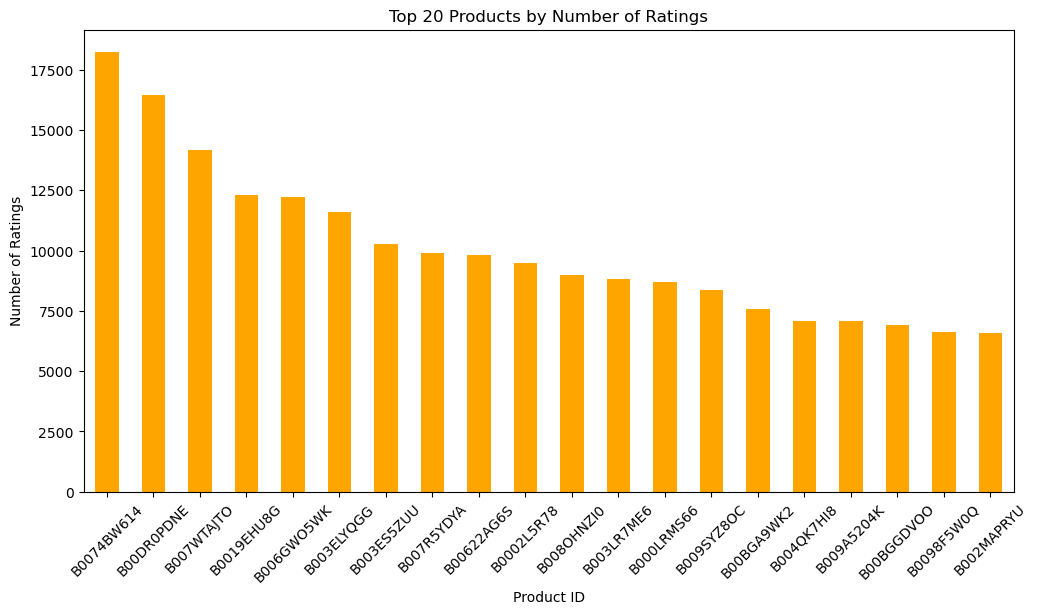

In [31]:
#Bar Chart for Categorical Variables (Top 20 Products by Ratings Count)
plt.figure(figsize=(12,6))
df['Product_Id'].value_counts().head(20).plot(kind='bar', color='orange')
plt.title('Top 20 Products by Number of Ratings')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

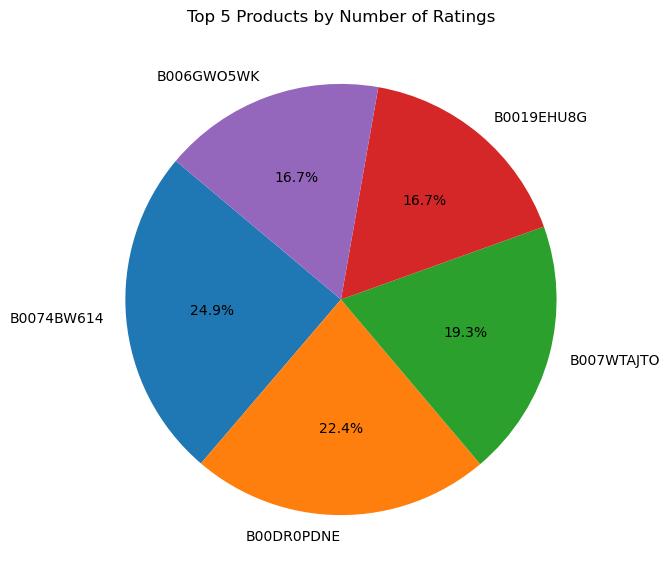

In [32]:
# Pie Chart for Top 5 products
top5_products = df['Product_Id'].value_counts().head(5)
plt.figure(figsize=(7,7))
plt.pie(top5_products, labels=top5_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Products by Number of Ratings')
plt.show()

In [33]:
#for product based analysis
df["is_1"] = (df["Ratings"] == 1).astype("int64")
df["is_3"] = (df["Ratings"] == 3).astype("int64")
df["is_4"] = (df["Ratings"] == 4).astype("int64")
df["is_5"] = (df["Ratings"] == 5).astype("int64")

In [34]:
# Step 1: Count ratings per product
product_rating_counts = df.groupby("Product_Id")[["is_1", "is_3", "is_4", "is_5"]].sum().reset_index()

# Rename columns for clarity
product_rating_counts.columns = ["Product_Id", "num_1_rating", "num_3_rating", "num_4_rating", "num_5_rating"]

In [35]:
# Compute total number of clicks, carts, and orders
total_1_rating = product_rating_counts["num_1_rating"].sum()
total_3_rating = product_rating_counts["num_3_rating"].sum()
total_4_rating = product_rating_counts["num_4_rating"].sum()
total_5_rating = product_rating_counts["num_5_rating"].sum()

In [36]:
# Add percentage columns
product_rating_counts["1_percentage"] = (product_rating_counts["num_1_rating"] / total_1_rating) * 100
product_rating_counts["3_percentage"] = (product_rating_counts["num_3_rating"] / total_3_rating) * 100
product_rating_counts["4_percentage"] = (product_rating_counts["num_4_rating"] / total_4_rating) * 100
product_rating_counts["5_percentage"] = (product_rating_counts["num_5_rating"] / total_5_rating) * 100

In [37]:
product_rating_counts = product_rating_counts.sort_values("5_percentage", ascending=False)

product_rating_counts.head(20).style.set_table_styles(
    [
        {"selector": "th", "props": [("background-color", "#016FD0"), ("color", "white"), ("font-weight", "bold")]}
    ]
).hide(axis="index").background_gradient(subset=["5_percentage"], cmap="Blues")  # Blue-Green gradient

Product_Id,num_1_rating,num_3_rating,num_4_rating,num_5_rating,1_percentage,3_percentage,4_percentage,5_percentage
B0074BW614,564,1058,3333,12765,0.062544,0.167121,0.224326,0.293614
B007WTAJTO,1222,413,1570,10674,0.135512,0.065237,0.105668,0.245518
B0019EHU8G,298,220,1003,10637,0.033046,0.034751,0.067507,0.244667
B003ES5ZUU,251,259,1173,8480,0.027834,0.040912,0.078948,0.195053
B00DR0PDNE,1648,1932,3323,8281,0.182753,0.305178,0.223653,0.190476
B006GWO5WK,831,923,1937,8111,0.092153,0.145797,0.130369,0.186565
B007R5YDYA,104,387,1395,7862,0.011533,0.061130,0.093890,0.180838
B003ELYQGG,494,798,2114,7754,0.054781,0.126052,0.142282,0.178354
B000LRMS66,130,188,997,7324,0.014416,0.029696,0.067103,0.168463
B0002L5R78,695,381,1053,7146,0.077071,0.060183,0.070872,0.164369


In [38]:
df.head()

,User_Id,Product_Id,Ratings,Timestamp,datetime,hour,weekday,weekday_number,month,is_1,is_3,is_4,is_5
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,1970-01-16 12:31:40.800,12,Friday,4,1,0,0,0,1
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,1970-01-16 19:46:33.600,19,Friday,4,1,1,0,0,0
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,1970-01-16 21:47:31.200,21,Friday,4,1,0,1,0,0
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,1970-01-16 10:45:07.200,10,Friday,4,1,1,0,0,0
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600,1970-01-17 04:10:33.600,4,Saturday,5,1,0,0,0,1


In [39]:
#Distribution through Visualization

In [40]:
popular_products = pd.DataFrame(df.groupby('Product_Id')['Ratings'].count())  #counting how many ratings each product has 
most_popular = popular_products.sort_values('Ratings', ascending=False)  #descending order
most_popular.head(10)

,Ratings
Product_Id,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226
B003ELYQGG,11617
B003ES5ZUU,10276
B007R5YDYA,9907
B00622AG6S,9823


<Axes: xlabel='Product_Id'>

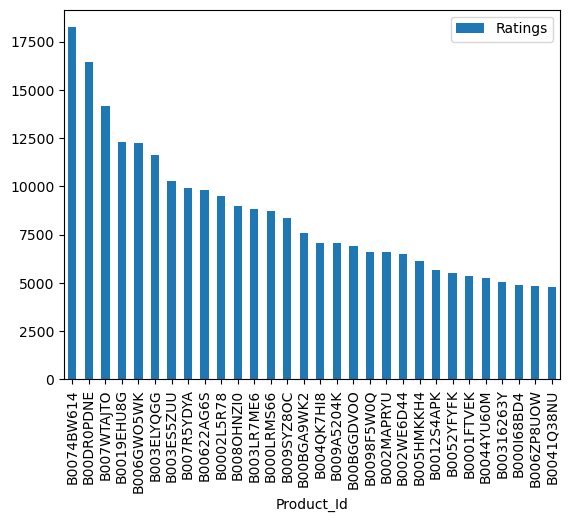

In [41]:
most_popular.head(30).plot(kind = "bar")

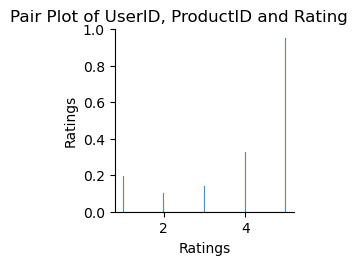

In [42]:
#Pairplot
sns.pairplot(df[['User_Id', 'Product_Id', 'Ratings']])
plt.suptitle('Pair Plot of UserID, ProductID and Rating', y=1.02)
plt.show()

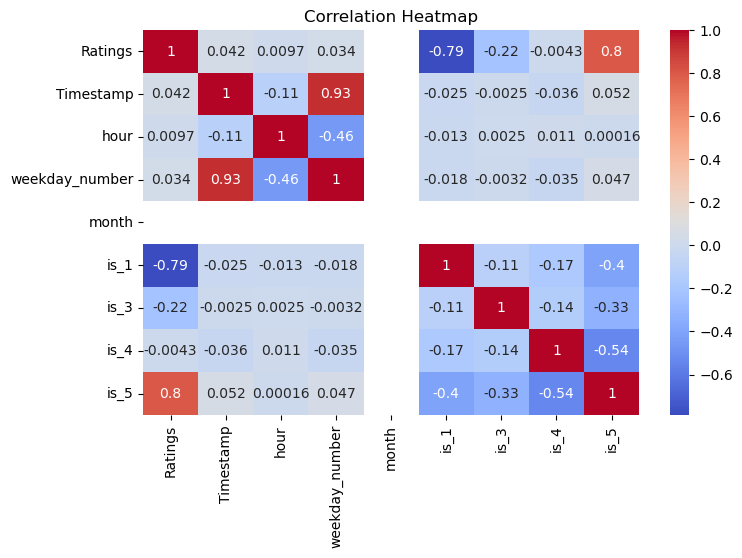

In [43]:
#Correlation heatmaps to explore relationships between pairs of variables.

plt.figure(figsize=(8,5))
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



#Rating correlated 100% with itself
#userId and productId are integers but not real numeric features. So, no strong correlation with Rating.
#No strong multi-variable correlation because this is user-item-rating data, not a feature-based dataset (like age, price, etc.).

In [44]:
# ✅ ✅ ✅ Cluster(k-means)

In [45]:
# Sample 10,000 users with ratings
# dropping duplicates( sampling only unique users )
# using same value of random state gives same random output every time it runs (an arbitary number)

sample_users = df['User_Id'].drop_duplicates().sample(n=10000, random_state=42) 
df_sample = df[df['User_Id'].isin(sample_users)]

In [46]:
df_sample.head(10) #sample of unique users

,User_Id,Product_Id,Ratings,Timestamp,datetime,hour,weekday,weekday_number,month,is_1,is_3,is_4,is_5
232,A2ZSAJ28QS6Z68,0972683275,5.0,1357257600,1970-01-16 17:00:57.600,17,Friday,4,1,0,0,0,1
919,A20WKO5G1YTC0H,0972683275,5.0,1369785600,1970-01-16 20:29:45.600,20,Friday,4,1,0,0,0,1
1798,A32DU7K2MPN9WF,1400501776,1.0,1385424000,1970-01-17 00:50:24.000,0,Saturday,5,1,1,0,0,0
2164,ANSB7OILD0L3C,1400532655,1.0,1359936000,1970-01-16 17:45:36.000,17,Friday,4,1,1,0,0,0
2170,ANLTHUP7BM3QC,1400532655,5.0,1291420800,1970-01-15 22:43:40.800,22,Thursday,3,1,0,0,0,1
2360,A1F0AHWYIXQGP,1400532655,5.0,1368144000,1970-01-16 20:02:24.000,20,Friday,4,1,0,0,0,1
3038,A2T1C894XI5Y4V,1400599997,5.0,1268697600,1970-01-15 16:24:57.600,16,Thursday,3,1,0,0,0,1
3361,A2MQ1NGA4OQIOY,1400698987,5.0,1389312000,1970-01-17 01:55:12.000,1,Saturday,5,1,0,0,0,1
4367,A2A2JYDOR6GJ3E,8862935293,2.0,1284595200,1970-01-15 20:49:55.200,20,Thursday,3,1,0,0,0,0
4628,A3O8L4OKEOBM6W,9269807207,1.0,1394064000,1970-01-17 03:14:24.000,3,Saturday,5,1,1,0,0,0


In [47]:
user_item_matrix = df_sample.pivot_table(index='User_Id', columns='Product_Id', values='Ratings').fillna(0)
print(user_item_matrix.shape) #unique users and unique products
print(user_item_matrix.head(3)) #number of user_id is given as an input

(10000, 13346)
Product_Id             0972683275  1400501776  1400532655  1400599997  \
User_Id                                                                 
A020810936HEERXB8L83C         0.0         0.0         0.0         0.0   
A0271722ML8981R4SFFJ          0.0         0.0         0.0         0.0   
A03359932GCQMUKJ5PTSC         0.0         0.0         0.0         0.0   

Product_Id             1400698987  8862935293  9269807207  9966288953  \
User_Id                                                                 
A020810936HEERXB8L83C         0.0         0.0         0.0         0.0   
A0271722ML8981R4SFFJ          0.0         0.0         0.0         0.0   
A03359932GCQMUKJ5PTSC         0.0         0.0         0.0         0.0   

Product_Id             996638961X  9966569863  ...  B00K4PAZLU  B00K4VQZCM  \
User_Id                                        ...                           
A020810936HEERXB8L83C         0.0         0.0  ...         0.0         0.0   
A0271722ML8981R4SFF

In [48]:
#✅ collaborative filtering approach based on clustering instead of similarity scores.
#Group users into clusters based on their behavior (ratings) and recommend items popular in the user's cluster.

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [50]:
# Assuming df_sample is already prepped
user_item_matrix = df_sample.pivot_table(index='User_Id', columns='Product_Id', values='Ratings').fillna(0)

user_item_matrix = user_item_matrix.loc[:, (user_item_matrix != 0).any(axis=0)]
#to reduce noise and dimensionality, we remove columns of value zero

#matrix of rows,columns,values


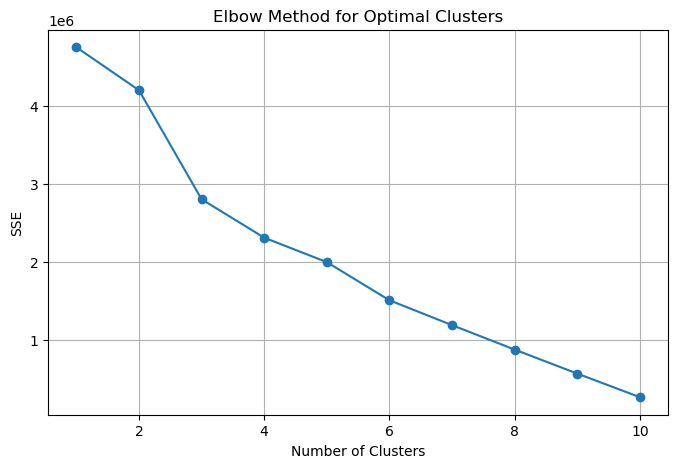

In [51]:
# Scale(standardising the data)
scaler = StandardScaler()
user_item_scaled = scaler.fit_transform(user_item_matrix)

# Apply PCA (principal component analysis)(compressing the data)
pca = PCA(n_components=10)  # Adjust based on explained variance(the number of dimensions are 10)
user_item_reduced = pca.fit_transform(user_item_scaled)

# Elbow Method only once
sse = [] #sum of squared errors
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_item_reduced)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [52]:
# Determine optimal cluster count based on elbow method
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(user_item_reduced)
user_item_matrix['Cluster'] = clusters



# Save model including clusters
if not os.path.exists('model'):
    os.makedirs('model')
with open('model/user_item_matrix.pkl', 'wb') as f:
    pickle.dump(user_item_matrix, f)

print("Model including clusters saved successfully")




# Display the updated DataFrame to check the cluster assignment
print(user_item_matrix.shape)
print(user_item_matrix.head())

Model including clusters saved successfully
(10000, 13347)
Product_Id             0972683275  1400501776  1400532655  1400599997  \
User_Id                                                                 
A020810936HEERXB8L83C         0.0         0.0         0.0         0.0   
A0271722ML8981R4SFFJ          0.0         0.0         0.0         0.0   
A03359932GCQMUKJ5PTSC         0.0         0.0         0.0         0.0   
A042775833P5UMLQ7W710         0.0         0.0         0.0         0.0   
A046931523469O18CB0VY         0.0         0.0         0.0         0.0   

Product_Id             1400698987  8862935293  9269807207  9966288953  \
User_Id                                                                 
A020810936HEERXB8L83C         0.0         0.0         0.0         0.0   
A0271722ML8981R4SFFJ          0.0         0.0         0.0         0.0   
A03359932GCQMUKJ5PTSC         0.0         0.0         0.0         0.0   
A042775833P5UMLQ7W710         0.0         0.0         0.0       

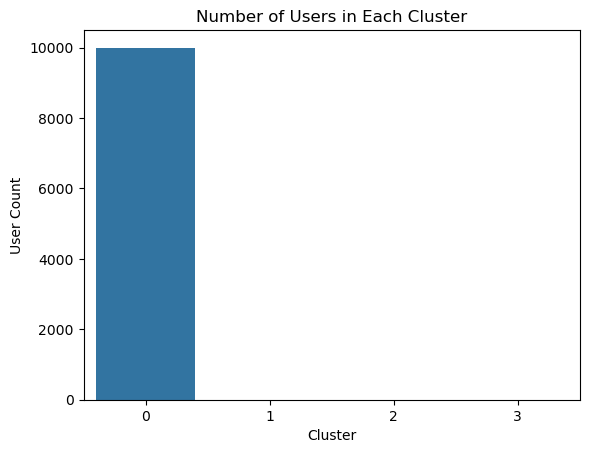

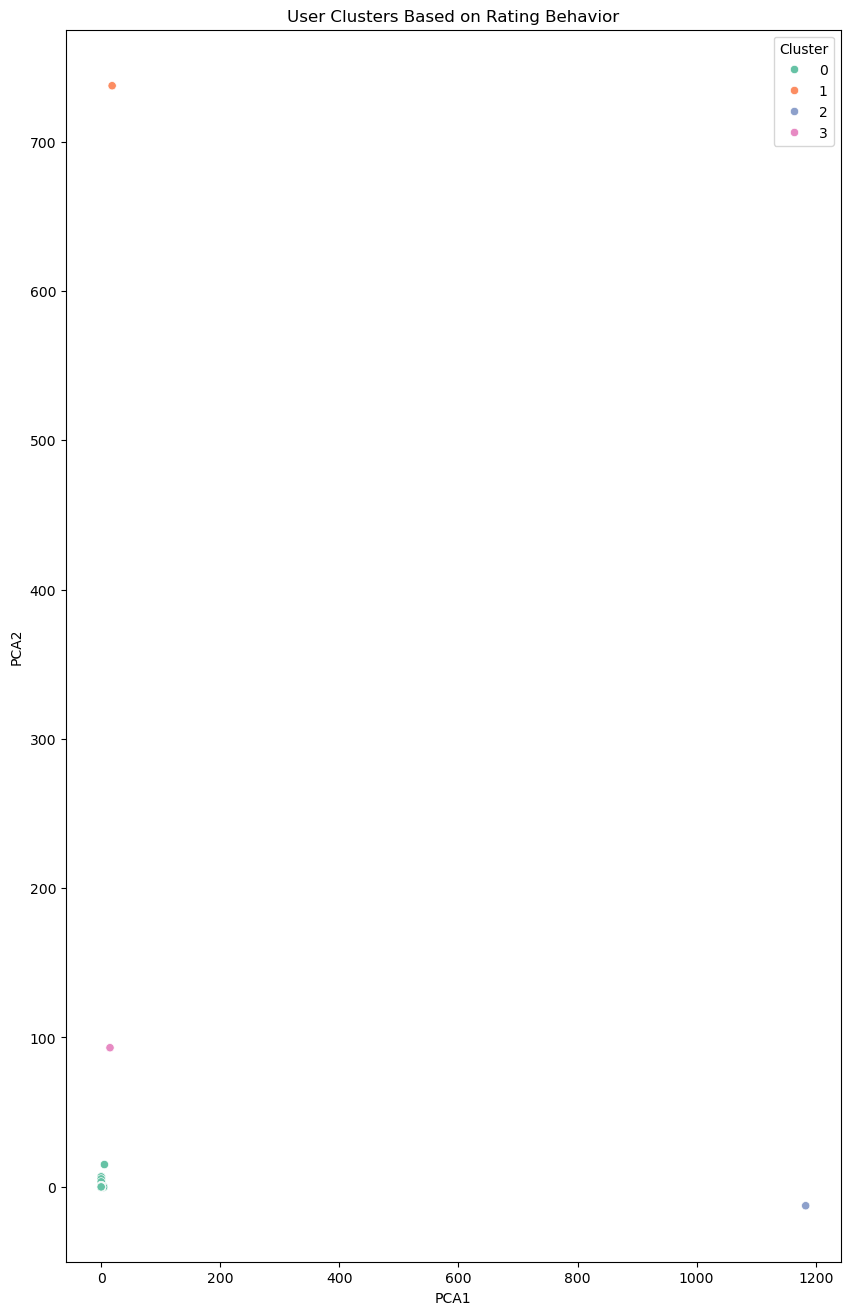

In [53]:
# Check cluster distribution
cluster_counts = user_item_matrix['Cluster'].value_counts()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title("Number of Users in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("User Count")
plt.show()

# Visualize Clusters using PCA
pca_df = pd.DataFrame(user_item_reduced[:, :2], columns=["PCA1", "PCA2"])  # Use first two PCA components for plotting
pca_df["Cluster"] = clusters

plt.figure(figsize=(10, 16))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("User Clusters Based on Rating Behavior")
plt.show()

In [54]:
#Filters the user_item_matrix to include only users in the same cluster as the given user. 
#Drops the 'Cluster' column to leave only the item ratings.
#Calculates the average rating score for each product within the user's cluster. 
#Sorts the products in descending order of popularity (based on average).
#Returns the top N products (based on cluster-wide average scores).
#These are the recommended items for the user, based on what their peer group (cluster) tends to prefer.
#This runs the function for a specific user (with ID 'A020810936HEERXB8L83C') and prints out their top 5 product recommendations.

In [55]:
##
def cluster_based_recommendations(user_id, n=5):
    # Check if user ID exists in user-item matrix
    if user_id not in user_item_matrix.index:
        return f"User ID {user_id} not found in the dataset."

    # Retrieve user's cluster ID
    try:
        cluster_id = user_item_matrix.loc[user_id, 'Cluster']
        # Filter users in the same cluster
        cluster_users = user_item_matrix[user_item_matrix['Cluster'] == cluster_id].drop('Cluster', axis=1)

        if cluster_users.empty:
            return "No data available for this cluster."

        # Compute mean ratings of products within the cluster
        mean_ratings = cluster_users.mean(axis=0).sort_values(ascending=False)

        # Filter products that have actually been rated by the cluster
        top_recommendations = mean_ratings.head(n)

        if top_recommendations.empty:
            return "No recommendations available."

        # Format it into a readable output
        recommendation_list = [f"Product ID: {pid}, Score: {score:.3f}" for pid, score in top_recommendations.items()]
        return "\n".join(recommendation_list)

    except KeyError:
        return "Could not retrieve results for the specified user ID."

# Test the function
print("Cluster-based Recommendations:")
print(cluster_based_recommendations(user_id='A020810936HEERXB8L83C'))

Cluster-based Recommendations:
Product ID: B0074BW614, Score: 0.020
Product ID: B007WTAJTO, Score: 0.014
Product ID: B003ELYQGG, Score: 0.013
Product ID: B00DR0PDNE, Score: 0.013
Product ID: B0019EHU8G, Score: 0.012


In [56]:
#📊 Insights and Purpose This is a collaborative filtering approach based on clustering instead of similarity scores.
#It assumes: "Users in the same cluster behave similarly, so popular items in the cluster are likely to be good recommendations for any member."
#It’s scalable and interpretable, and works well even if some users haven’t interacted with many products (cold start relief).

In [57]:
#1. Average Product Ratings per Cluster (Bar Plot) This shows the top products per cluster by average interaction/rating:

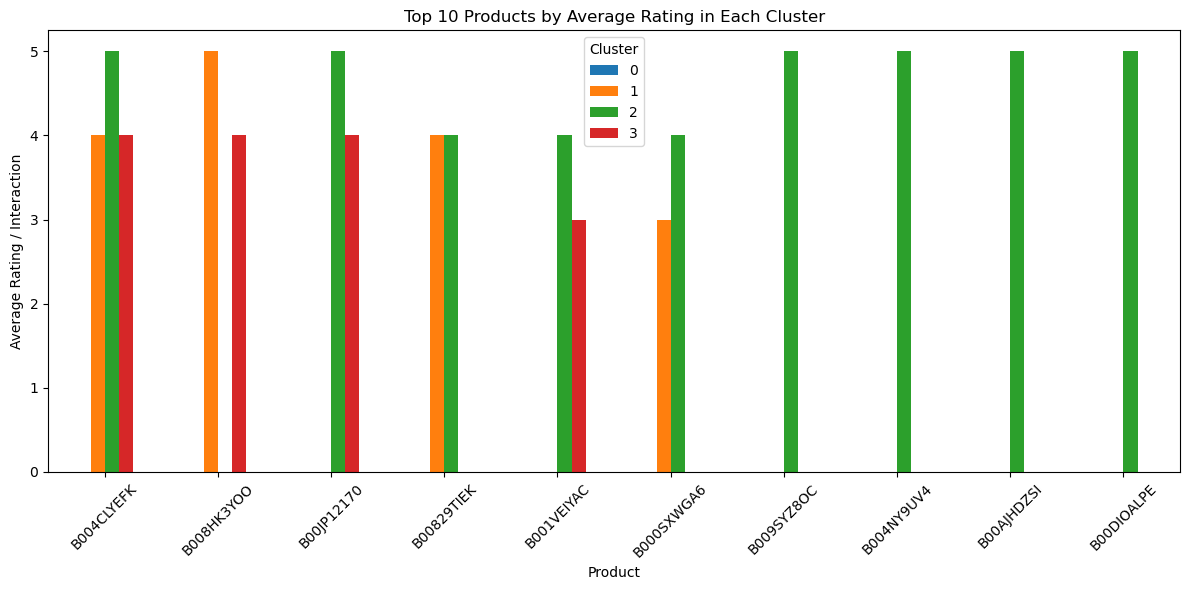

In [58]:
# Assume 'user_item_matrix' has 'Cluster' column and product columns
cluster_means = user_item_matrix.groupby('Cluster').mean()

# Transpose for better plotting: products as rows, clusters as columns
cluster_means_T = cluster_means.T

# Plot top 10 most popular items across clusters
top_items = cluster_means_T.mean(axis=1).sort_values(ascending=False).head(10).index
top_cluster_means = cluster_means_T.loc[top_items]

top_cluster_means.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Products by Average Rating in Each Cluster")
plt.ylabel("Average Rating / Interaction")
plt.xlabel("Product")
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
#2. Cluster Size Distribution This helps you understand how users are distributed among clusters:

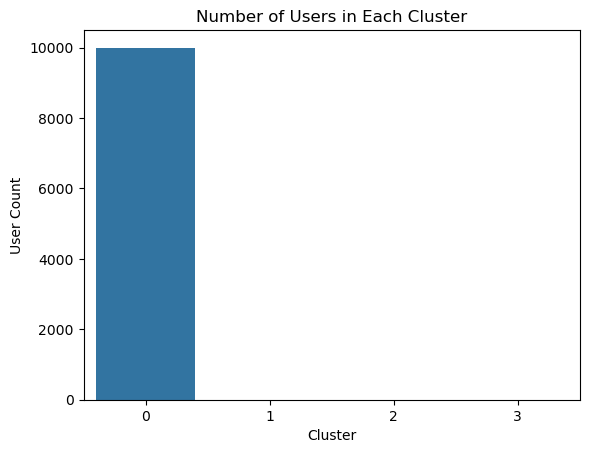

In [60]:
cluster_counts = user_item_matrix['Cluster'].value_counts().sort_index()

sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title("Number of Users in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("User Count")
plt.show()

In [61]:
#✅ Collaborative Filtering (User-Item)

In [62]:
# Sample 10,000 users with ratings
sample_users = df['User_Id'].drop_duplicates().sample(n=10000, random_state=42)
df_sample = df[df['User_Id'].isin(sample_users)]

In [63]:
user_item_matrix = df_sample.pivot_table(index='User_Id', columns='Product_Id', values='Ratings').fillna(0)
print(user_item_matrix.shape)
print(user_item_matrix.head())

(10000, 13346)
Product_Id             0972683275  1400501776  1400532655  1400599997  \
User_Id                                                                 
A020810936HEERXB8L83C         0.0         0.0         0.0         0.0   
A0271722ML8981R4SFFJ          0.0         0.0         0.0         0.0   
A03359932GCQMUKJ5PTSC         0.0         0.0         0.0         0.0   
A042775833P5UMLQ7W710         0.0         0.0         0.0         0.0   
A046931523469O18CB0VY         0.0         0.0         0.0         0.0   

Product_Id             1400698987  8862935293  9269807207  9966288953  \
User_Id                                                                 
A020810936HEERXB8L83C         0.0         0.0         0.0         0.0   
A0271722ML8981R4SFFJ          0.0         0.0         0.0         0.0   
A03359932GCQMUKJ5PTSC         0.0         0.0         0.0         0.0   
A042775833P5UMLQ7W710         0.0         0.0         0.0         0.0   
A046931523469O18CB0VY         0.0  

In [64]:
#formula to find similarity scores 
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, 
                                  index=user_item_matrix.index, 
                                  columns=user_item_matrix.index)

In [65]:
#Define Recommendation Function

In [66]:
def user_based_recommendations(target_user_id, n=5):
    if target_user_id not in user_item_matrix.index:
        return "User not found."

    # Get similarity scores for the target user
    sim_scores = user_similarity_df[target_user_id]

    # Drop the user themselves
    sim_scores = sim_scores.drop(target_user_id)

    # Get top N similar users
    top_users = sim_scores.sort_values(ascending=False).head(10)

    # Get their ratings matrix
    similar_users_ratings = user_item_matrix.loc[top_users.index]

    # Compute weighted average scores across these users
    weighted_scores = similar_users_ratings.T.dot(top_users)
    weighted_scores /= top_users.sum()

    # Remove items the target user has already rated
    rated_items = user_item_matrix.loc[target_user_id][user_item_matrix.loc[target_user_id] > 0].index
    recommendations = weighted_scores.drop(rated_items)

    return recommendations.sort_values(ascending=False).head(n)

In [67]:
print("User-based Recommendations for a sample user:")
print(user_based_recommendations('A19WXBLVXOWXQH'))

User-based Recommendations for a sample user:
Product_Id
B0026NW32C    2.071068
0972683275    0.000000
B005VFG06W    0.000000
B005VO7LG6    0.000000
B005VONPT8    0.000000
dtype: float64


In [68]:
#🔍 How It Works:
#-Finds users most similar to the target user.
#-Looks at what those users liked (rated highly).
#-Scores products by weighted average (more weight to more similar users).
#-Recommends products the target user hasn’t interacted with yet.

In [69]:
#📊 Benefits Strength Limitation Highly personalized Needs enough overlapping ratings Adapts to changing tastes. 
#Doesn’t work well for cold-start users.

In [70]:
#✅ Collaborative Filtering (Item-Item)

In [71]:
#reduce the product dimension:
top_products = df['Product_Id'].value_counts().head(500).index
df_sample = df_sample[df_sample['Product_Id'].isin(top_products)]
df_sample

,User_Id,Product_Id,Ratings,Timestamp,datetime,hour,weekday,weekday_number,month,is_1,is_3,is_4,is_5
22719,A261U1U95C37JW,B00001P4ZH,5.0,1289952000,1970-01-15 22:19:12.000,22,Thursday,3,1,0,0,0,1
23468,A19WXBLVXOWXQH,B00001P4ZH,5.0,1252454400,1970-01-15 11:54:14.400,11,Thursday,3,1,0,0,0,1
23897,A21PE03OMHEPDJ,B00001P4ZH,5.0,1326844800,1970-01-16 08:34:04.800,8,Friday,4,1,0,0,0,1
27824,A2394ZM1ZU5EWV,B00001WRSJ,5.0,1354752000,1970-01-16 16:19:12.000,16,Friday,4,1,0,0,0,1
44934,A3L53MXMJ1OOWV,B00004T8R2,4.0,1237075200,1970-01-15 07:37:55.200,7,Thursday,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719583,AQFZYK84ZH59W,B00GTGETFG,4.0,1403136000,1970-01-17 05:45:36.000,5,Saturday,5,1,0,0,1,0
7719693,A2FVOOK8LR6U67,B00GTGETFG,5.0,1404432000,1970-01-17 06:07:12.000,6,Saturday,5,1,0,0,0,1
7720143,AM8ZVW7MXVUCP,B00GTGETFG,5.0,1405987200,1970-01-17 06:33:07.200,6,Saturday,5,1,0,0,0,1
7720232,A1X2P7KDL9021V,B00GTGETFG,5.0,1401235200,1970-01-17 05:13:55.200,5,Saturday,5,1,0,0,0,1


In [72]:
user_item_matrix = df_sample.pivot_table(index='User_Id', columns='Product_Id', values='Ratings')
user_item_matrix

Product_Id,B00001P4ZH,B00001WRSJ,B00004T8R2,B00004ZCJE,B00005N6KG,B00005T3G0,B000065BP9,B000065BPB,B00007E7C8,B00007E7JU,...,B00DVFLJDS,B00E055H5O,B00E3W15P0,B00EF1OGOG,B00EL93M3S,B00EYW9DSU,B00F3SISYO,B00FFJ0HUE,B00FNPD1VW,B00GTGETFG
User_Id,,,,,,,,,,,,,,,,,,,,,
A1004HHMSDY5IP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1043UEBHFPPQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1092KB6UB29DU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10C3IAZUXZ705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10EJI60KA37BV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZUTYURG3FCHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZXSIPRHJ0050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZZ8Y759H5HLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Compute Similarity

from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(user_item_matrix.fillna(0).T)
item_similarity_df = pd.DataFrame(item_similarity, 
                                   index=user_item_matrix.columns, 
                                   columns=user_item_matrix.columns)

In [74]:
item_similarity_df

Product_Id,B00001P4ZH,B00001WRSJ,B00004T8R2,B00004ZCJE,B00005N6KG,B00005T3G0,B000065BP9,B000065BPB,B00007E7C8,B00007E7JU,...,B00DVFLJDS,B00E055H5O,B00E3W15P0,B00EF1OGOG,B00EL93M3S,B00EYW9DSU,B00F3SISYO,B00FFJ0HUE,B00FNPD1VW,B00GTGETFG
Product_Id,,,,,,,,,,,,,,,,,,,,,
B00001P4ZH,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00001WRSJ,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004T8R2,0.0,0.0,1.000000,0.207323,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004ZCJE,0.0,0.0,0.207323,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005N6KG,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00EYW9DSU,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
B00F3SISYO,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
B00FFJ0HUE,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
#📊Insights and Purpose This matrix is foundational for item-based recommendations.
#You can recommend items to a user by:
#Looking at items they rated highly.
#Finding other items similar to those (using this similarity matrix).
#Unlike clustering, this is fine-grained and personalized, making it a powerful tool in recommendation systems.

#🧠 How It Works: Suppose product_id = 'Wine'. This function will:
#Look at all other products.
#Score how similarly users rated/consumed them compared to 'Wine'.
#Return, for example: 'Champagne', 'Prosecco', 'Spirits', etc., if they had similar engagement patterns.

#📊 Insights & Use Case 
#-This function is key to content-based or item-item collaborative filtering.
#-Can be used in e-commerce (e.g., "You liked this? Try these too!"), streaming platforms, etc.
#-Helps keep recommendations relevant even with limited user history.

In [76]:
# Function to Recommend Similar Products
def recommend_similar_products(product_id, n=5):
    if product_id not in item_similarity_df.columns:
        return "Product not found."
    similar_products = item_similarity_df[product_id].sort_values(ascending=False).drop(product_id)
    similar_products = similar_products[similar_products > 0]  # filter non-zero similarity
    return similar_products.head(n)


In [77]:
# Example:
recommend_similar_products(product_id='B00GTGETFG')  # replace with actual ID from your dataset

Product_Id
B002QEBMAK    0.142248
Name: B00GTGETFG, dtype: float64

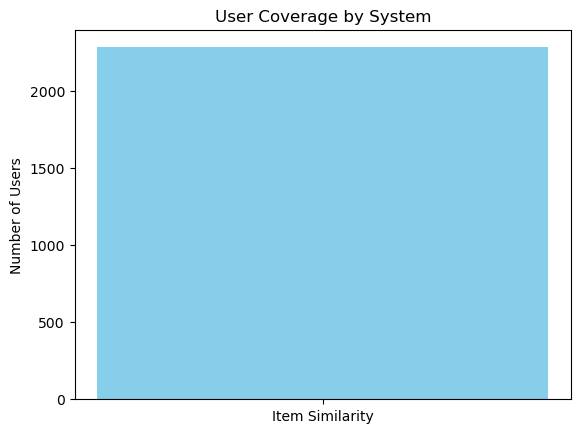

In [80]:
# Comparison 1: User Coverage
served_by_similarity = df_sample['User_Id'].nunique()

plt.bar(['Item Similarity'], [served_by_similarity], color=['skyblue'])
plt.title('User Coverage by System')
plt.ylabel('Number of Users')
plt.show()